
## Description
This notebook looks at some simple statistics of histortical intraday equity data. First we look at midprice and microprice, then order imbalance, stamped every 100 millisecond of the trading day. We will see that order imbalance tends to mean-revert, and has siginificant auto-correlation. Next, we look at the behaviour of order imbalance an instant before market order buys or sells arrive. The interesting aspect of this is that buy orders tend to arrive when the order imbalance is tilted to the buy side, while sell orders tend to arrive when the order imbalance is tilted to the sell side.

In [1]:

import scipy.io as sio  
import numpy as np      

from matplotlib.ticker import FuncFormatter 

import matplotlib.pyplot as plt  

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import kaiko
import pandas as pd 
import datetime as dt 

from os import environ 

# plotting packages 
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sio.loadmat('AMZN_20141126.mat')
FB = sio.loadmat('FB_20141126.mat')
EBAY = sio.loadmat('EBAY_20141126.mat')
MSFT = sio.loadmat('MSFT_20141126.mat')
INTC = sio.loadmat('INTC_20141126.mat')
PCAR = sio.loadmat('PCAR_20141126.mat')
SMH = sio.loadmat('SMH_20141126.mat')


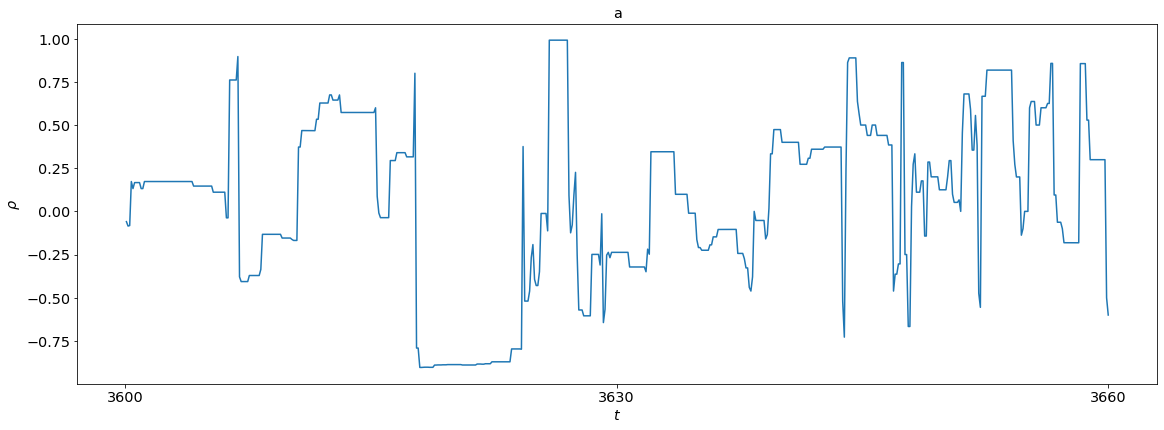

In [29]:

LOB=FB['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T



a = plt.axes([1, 1, 1, 1])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

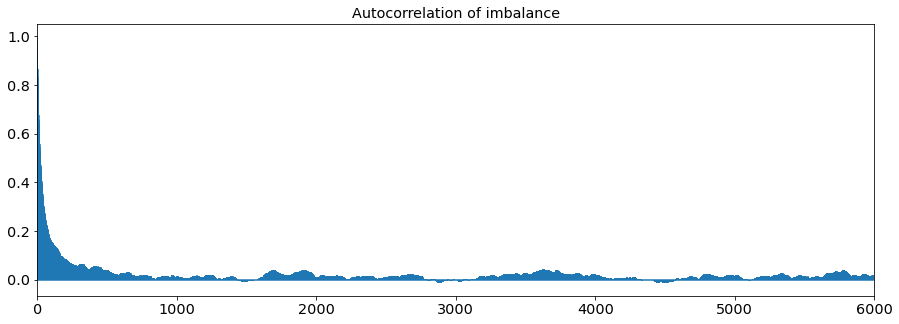

In [30]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

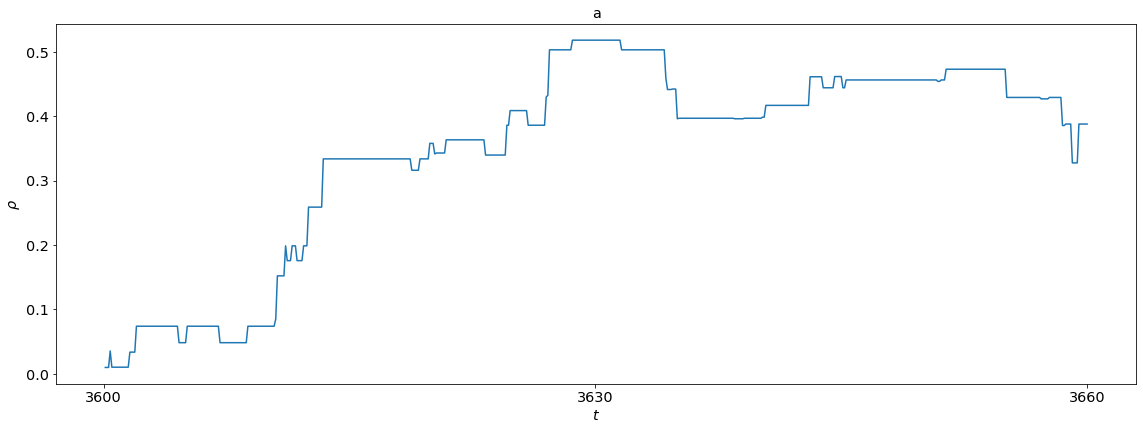

In [31]:

LOB=EBAY['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

a = plt.axes([1, 1, 1, 1])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

Ebay clearly demonstrates an asymmetric Imbalance

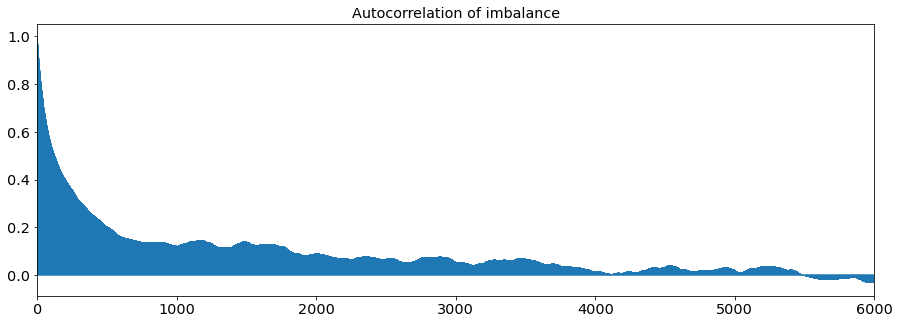

In [32]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

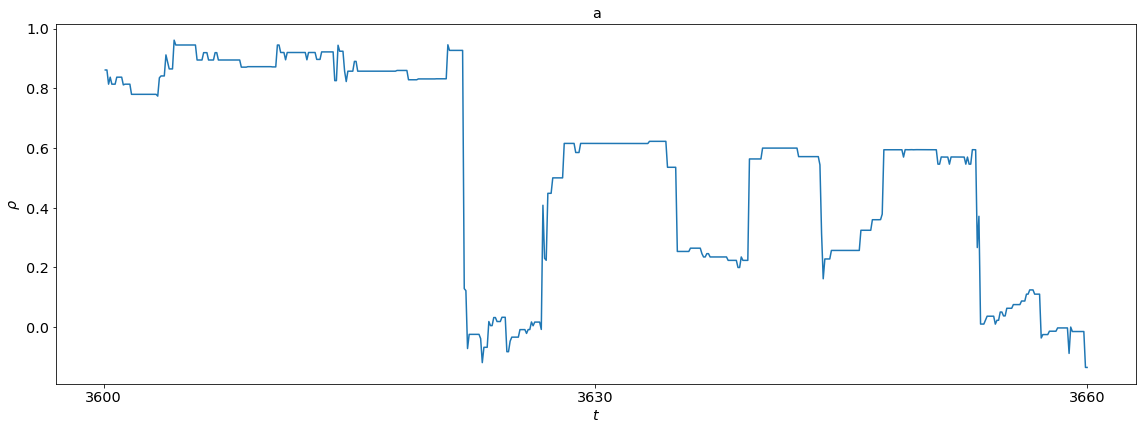

In [33]:

LOB=MSFT['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

a = plt.axes([1, 1, 1, 1])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

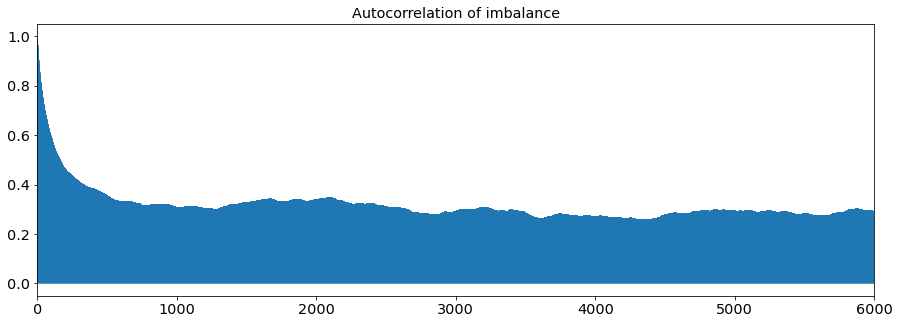

In [37]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

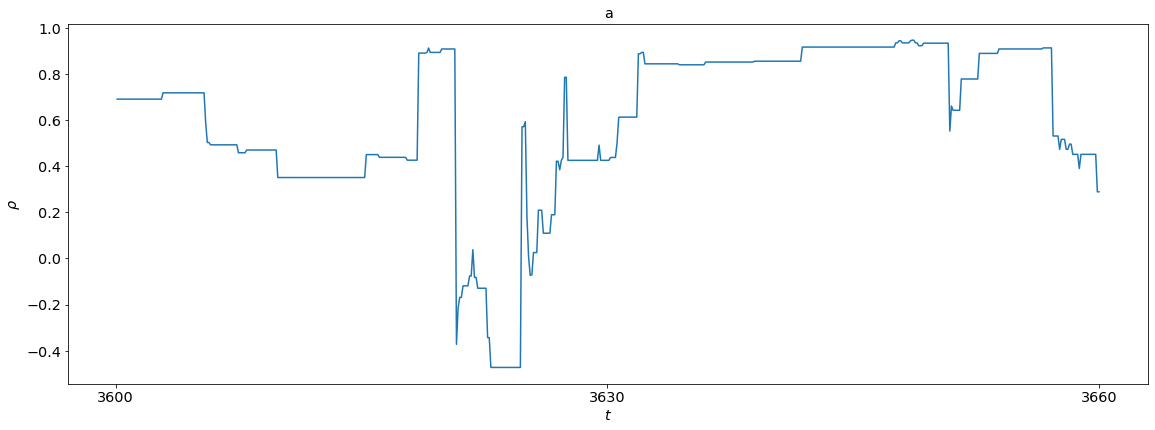

In [34]:

LOB=INTC['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

a = plt.axes([1, 1, 1, 1])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [ ]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

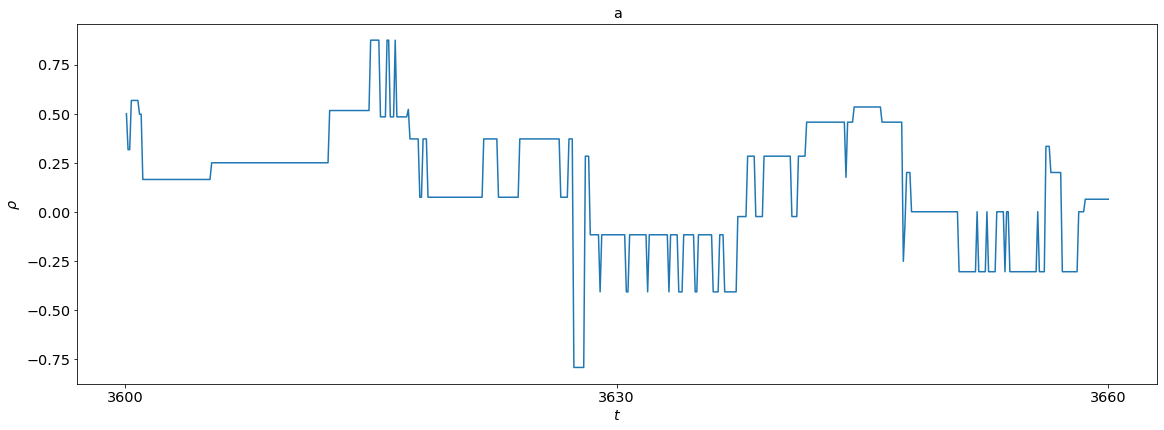

In [35]:

LOB=PCAR['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T


a = plt.axes([1, 1, 1, 1])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [ ]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

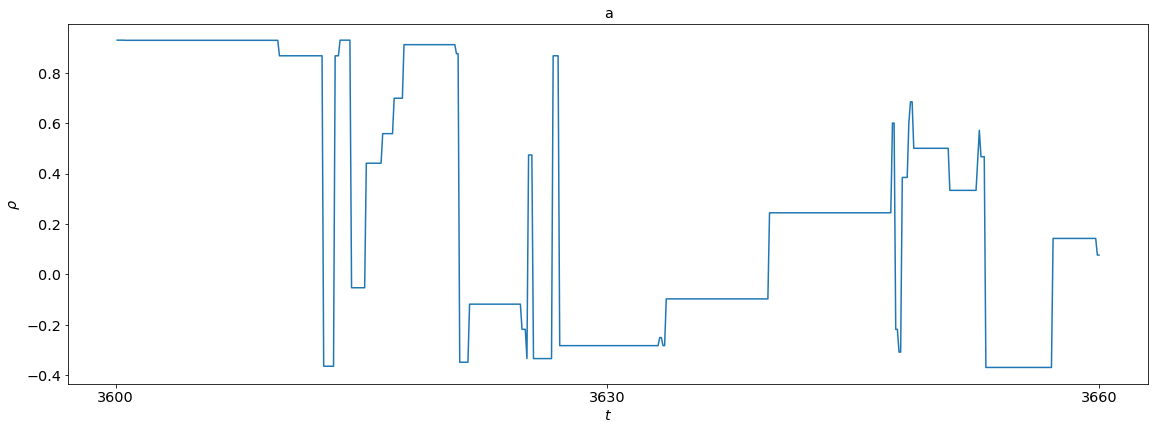

In [36]:

LOB=SMH['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

a = plt.axes([1, 1, 1, 1])

idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [ ]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

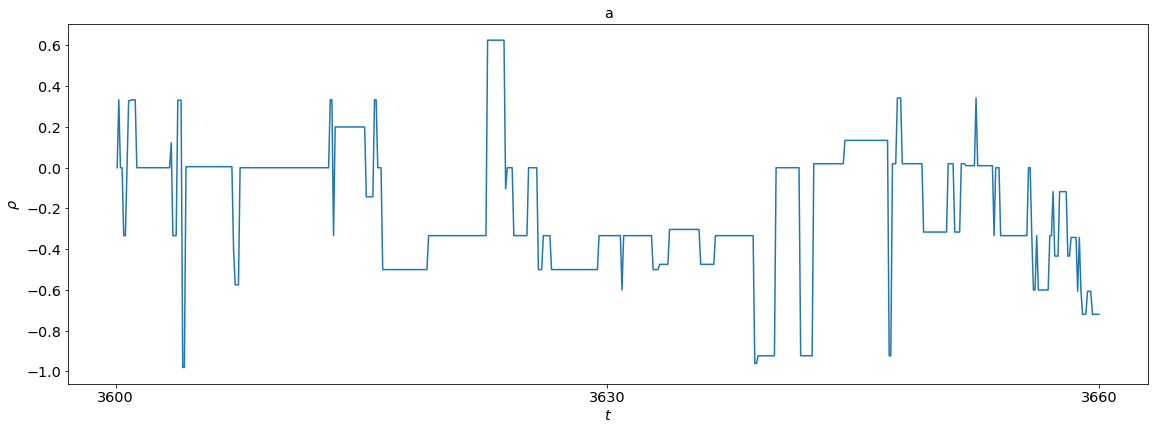

In [39]:

LOB=sio.loadmat('AMZN_20141106.mat')['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

a = plt.axes([1, 1, 1, 1])

idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

Lets look at historical Imbalance for Amazon

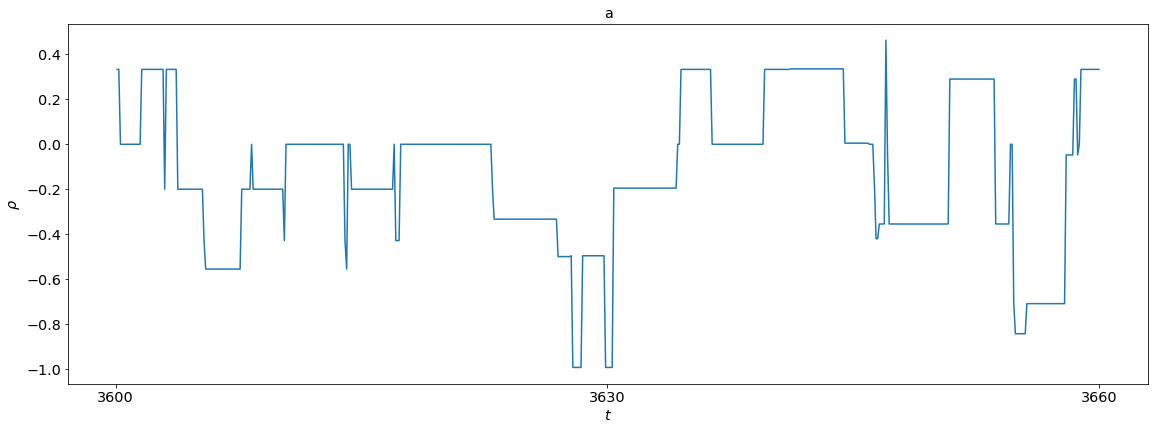

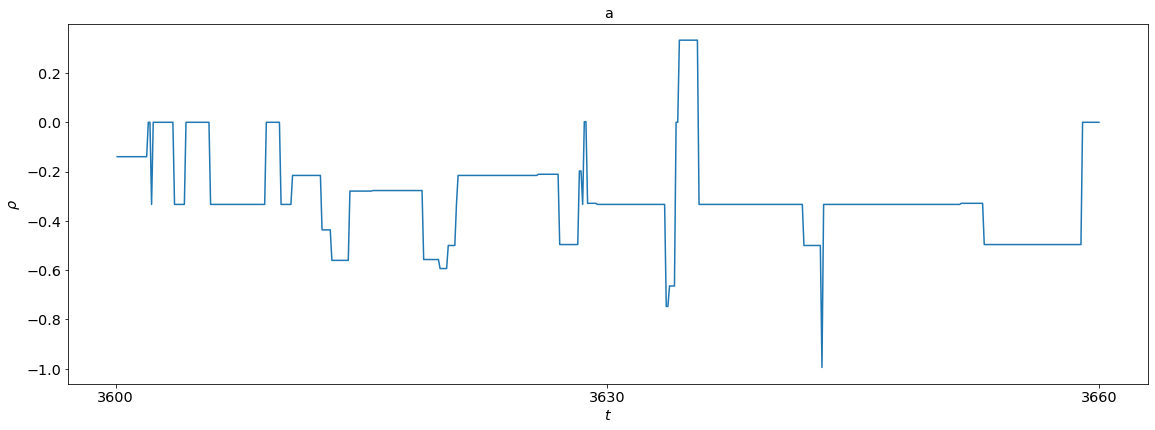

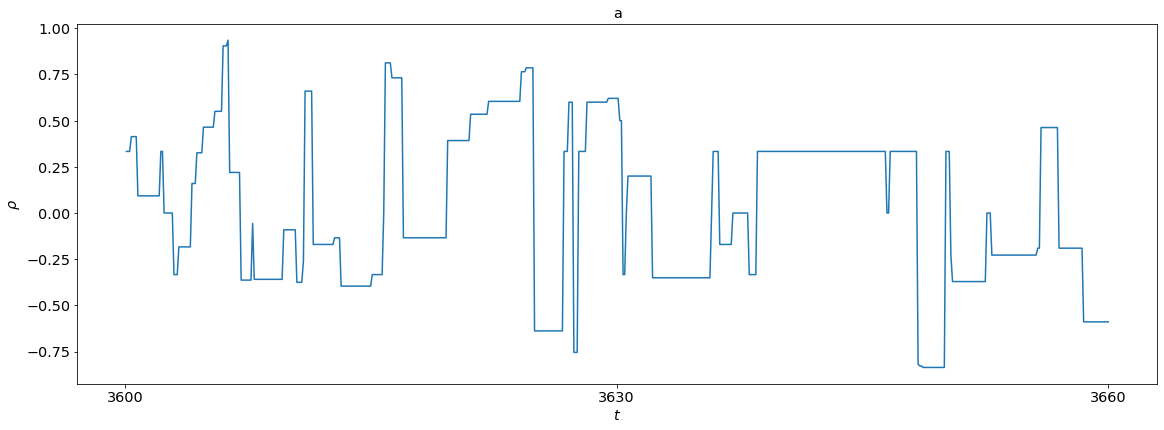

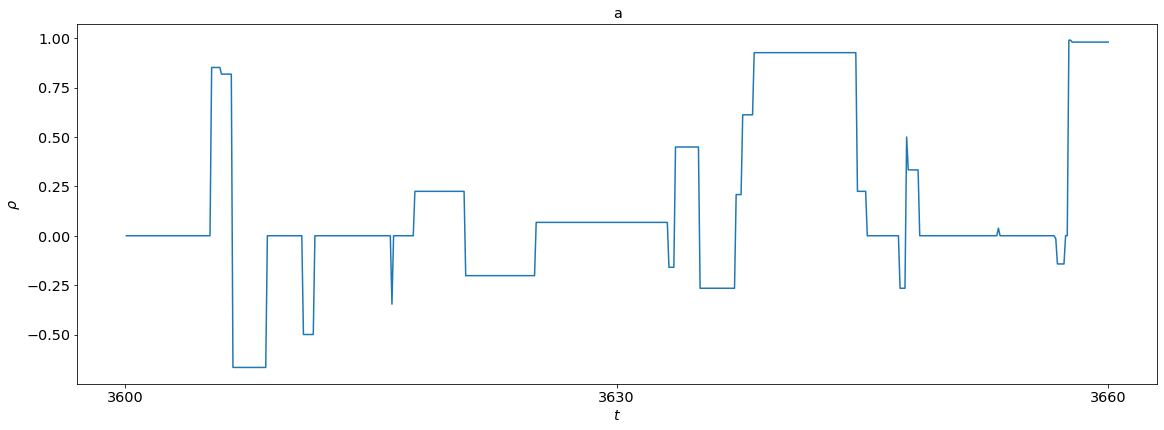

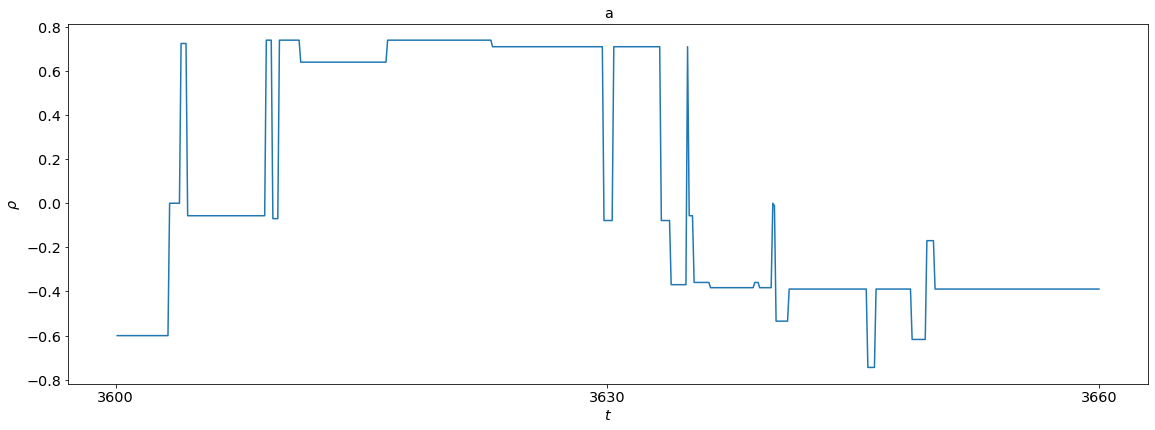

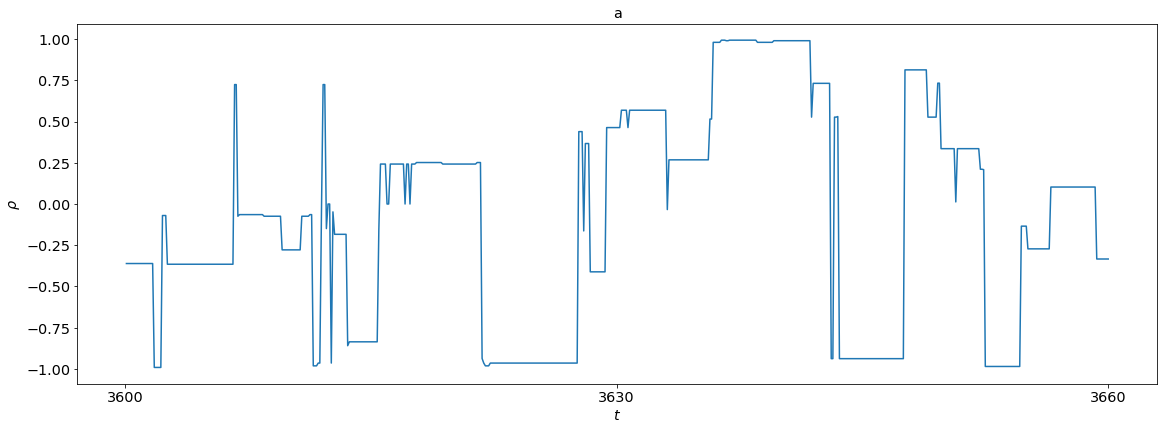

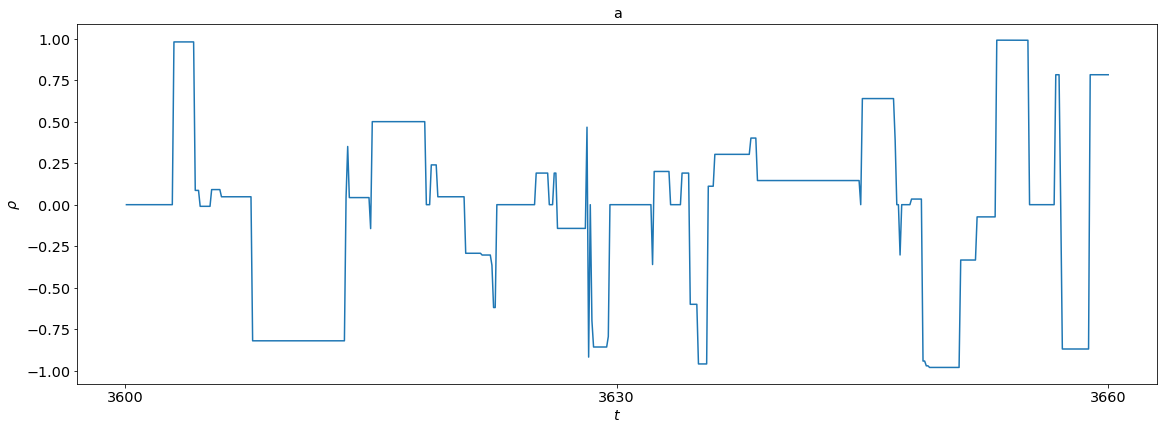

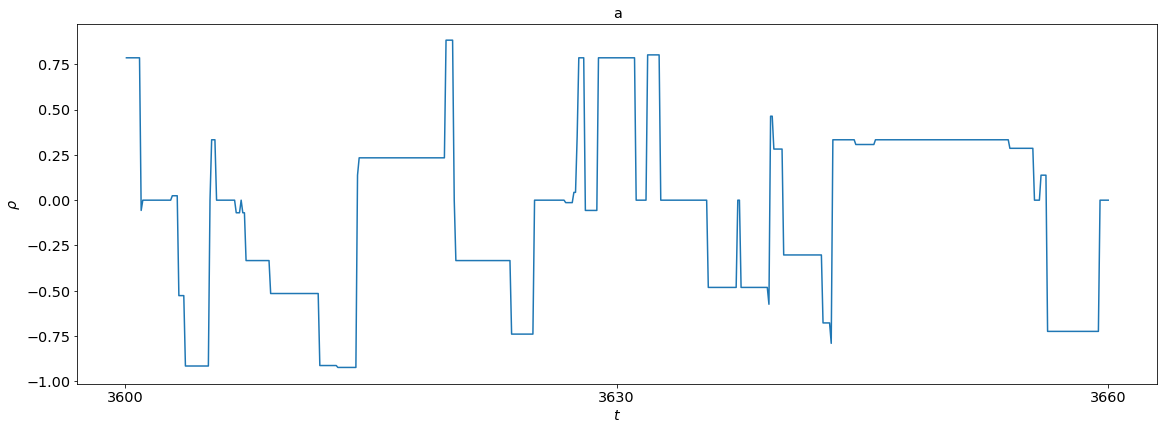

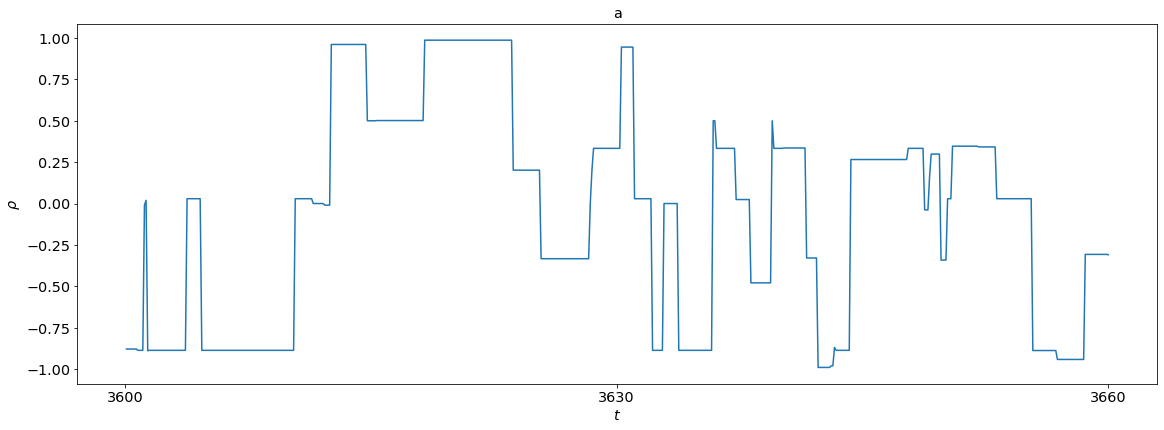

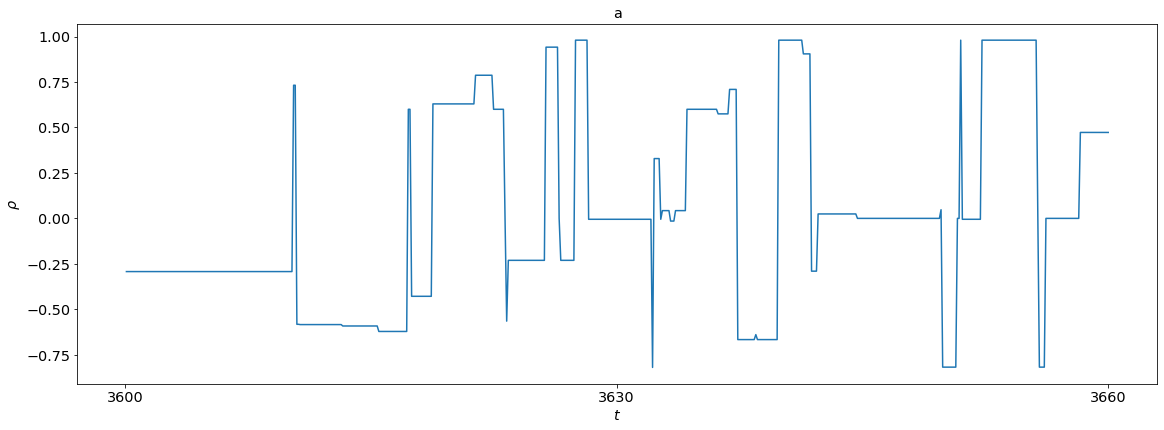

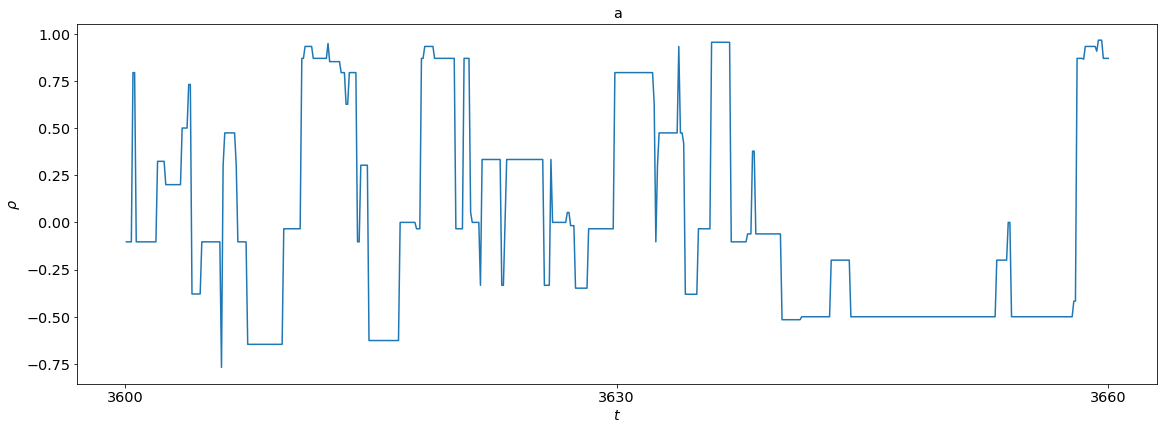

In [51]:

LOB=sio.loadmat('AMZN_20141121.mat')['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

a = plt.axes([1, 1, 1, 1])

idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [4]:

LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]


### Midprice, Microprice and Spread
Let $P^b_t$ and $P_t^a$ denote the best bid and ask prices, and $V_t^b$ and $V_t^a$ denote the volume posted at the best bid and ask. Then,

$$midprice_t=\tfrac{1}{2}(P^b_t+P^a_t)$$$$microprice_t=\frac{P^b_t\,V^a_t+P^a_t\,V^b_t}{V^a_t+V^b_t}$$$$spread_t=P_t^a-P_t^b$$

In [25]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

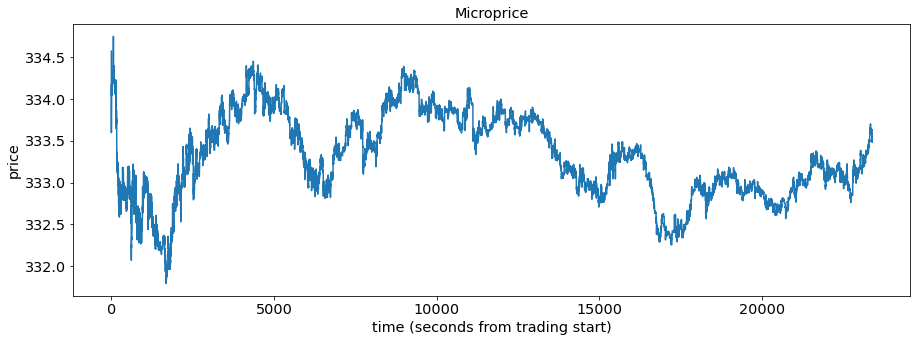

In [26]:

plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

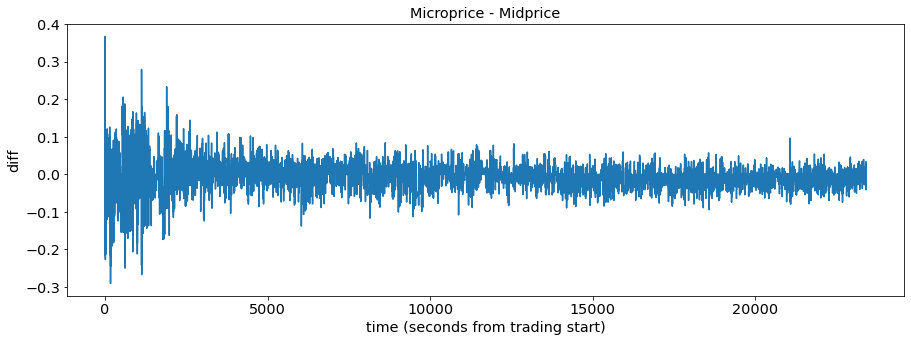

In [27]:

plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

Note that the difference is typically in the range $[-0.03, 0.04]$ while at the beginning of the day it is three times as large.



The Microprice is used as a more subtle proxy for the asset's transaction cost-free price, as it measures the tendency that the price has to move either toward the bid or ask side as captured by number of shared posted, and hence indicates the buy (sell) pressure in the market. If there are a lot of buyers (sellers), then the microprice is pushed toward the best ask/bid price to reflect the likelihood that prices are going to increase (decrease). 

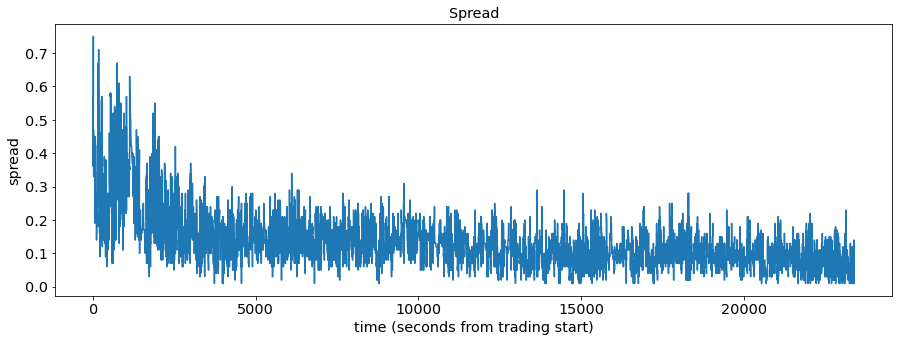

In [28]:

plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

This plot shows that the spread decays from about 0.7 in the morning, but quickly drops to 0.03 

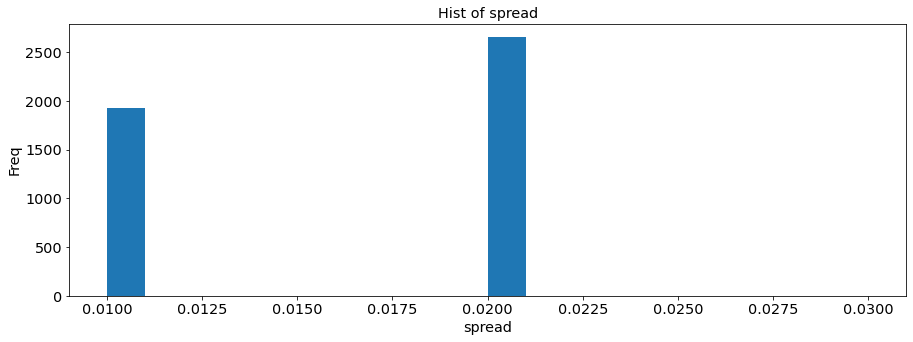

In [29]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()


## Volume Imbalance

Now, let us look at how volume imbalance at the best bid and ask varies through the day. Volume Imbalance measures whether the LOB is a buy or sell heavy


$$\rho_t=\frac{V_t^b-V_t^a}{V_t^b+V_t^a}\in(-1,1)$$

In [30]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T


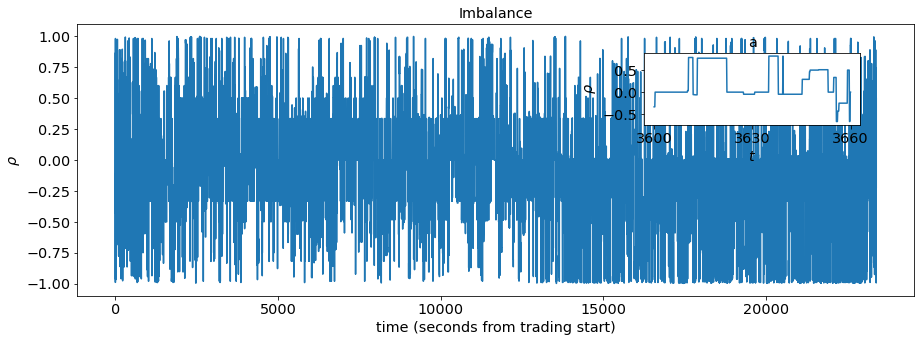

In [31]:

plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

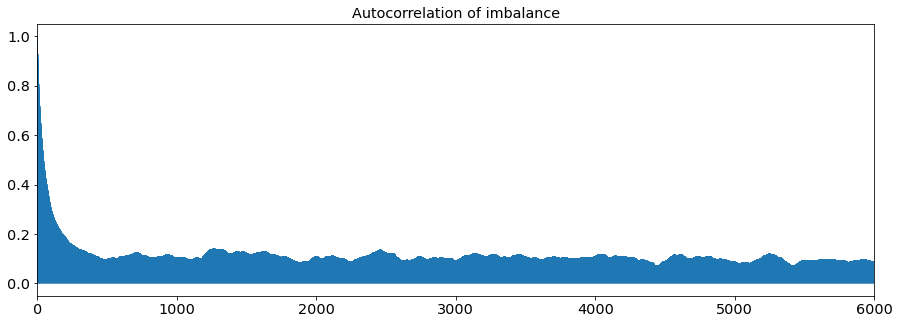

In [32]:

plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

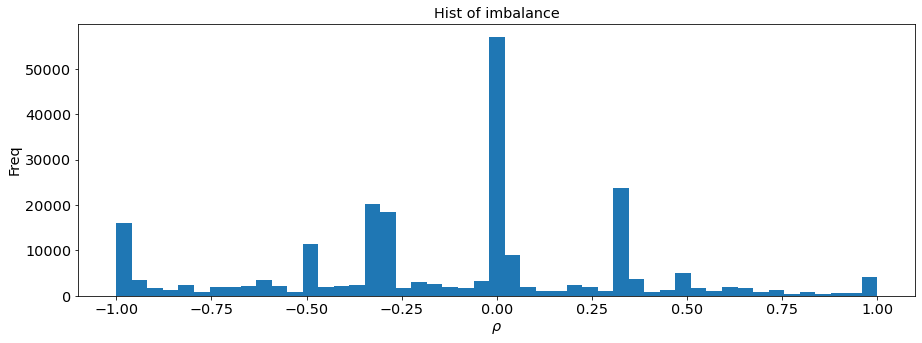

In [33]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [34]:

## transform imbalance using logit
y = -np.log(2/(1+rho)-1)

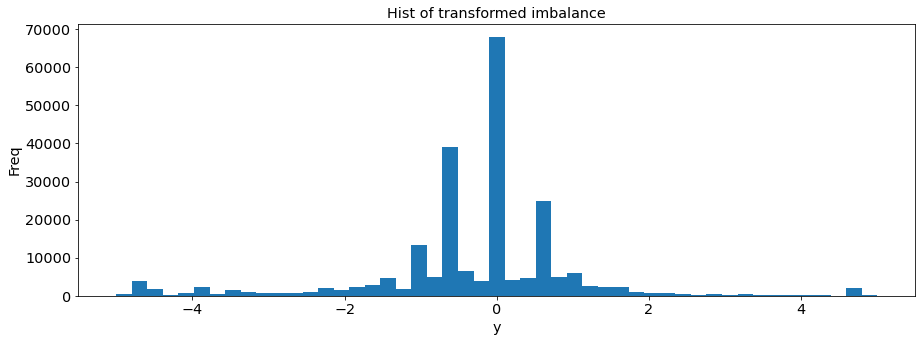

In [35]:

plt.hist(y, bins=np.linspace(-5, 5, num=50)) 
plt.title("Hist of transformed imbalance")
plt.xlabel('y')
plt.ylabel('Freq')
plt.show()

In [36]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])


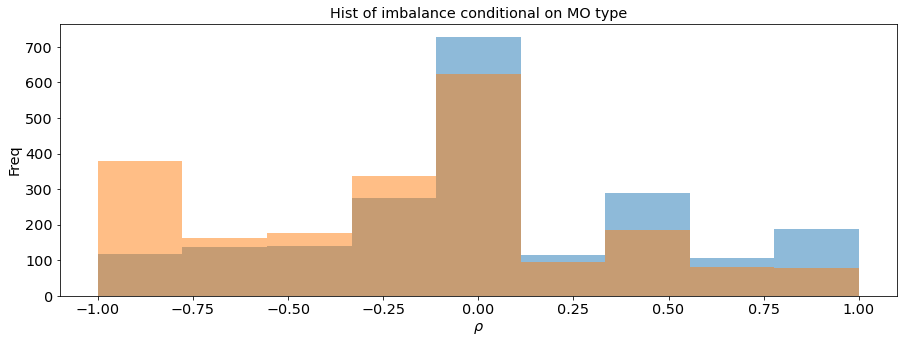

In [37]:

plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [38]:

# determine the rate of arrival of market orders conditional on order arrival in a specific bin 
def MOActivity(MO,rho,a,b):
    idx_rho = (rho>=a) & (rho<b)
    idx_rho_MO = (rho_MO>=a) & (rho_MO<b)
    idx_rho_MO_b = idx_rho_MO & (MO[:,7]==-1)
    idx_rho_MO_s = idx_rho_MO & (MO[:,7]==+1)
    
    return [np.sum(idx_rho_MO_b), np.sum(idx_rho_MO_s)]/(dt*np.sum(idx_rho))

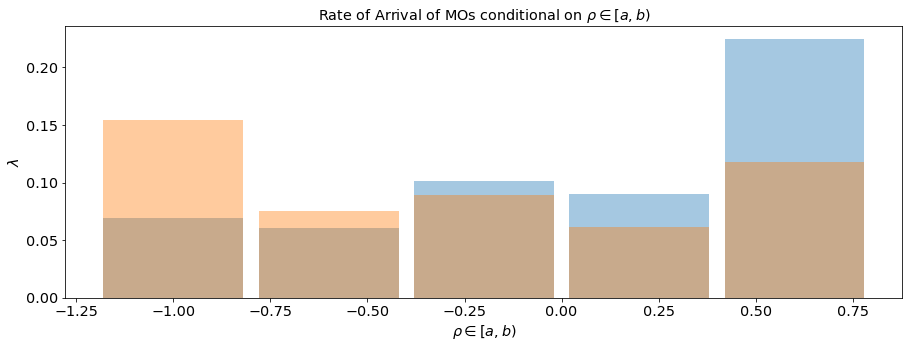

In [39]:

nbands=5
bands = np.array([-1+2*x/(nbands) for x in range(nbands+1)])

MO_activity=np.zeros((nbands,2))
for i in range(nbands):
    MO_activity[i,:] = MOActivity(MO,rho,bands[i],bands[i+1])
MO_activity=MO_activity.T

plt.bar(bands[0:nbands],MO_activity[0,:],width=[(bands[j+1]-bands[j])*0.9 for j in range(nbands)],alpha=0.4)
plt.bar(bands[0:nbands],MO_activity[1,:],width=[(bands[j+1]-bands[j])*0.9 for j in range(nbands)],alpha=0.4)
plt.title(r'Rate of Arrival of MOs conditional on $\rho\in[a,b)$')
plt.xlabel(r'$\rho\in[a,b)$')
plt.ylabel(r'$\lambda$')
plt.show()

In [40]:
def GenerateRhoTransition(rho,bands):
    rho_band = np.zeros((rho.size,1))

    for i in range(bands.size-1):
        idx_i = (rho>=bands[i]) & (rho<bands[i+1])
        rho_band[idx_i]=i

    rho_A = np.zeros((bands.size-1,bands.size-1))
    norm = np.zeros(bands.size-1)
    for i in range(bands.size-1):

        idx_i = (rho_band==i)

        idx_ip1 = idx_i
        idx_ip1[1:idx_i.size-1] = idx_i[0:idx_i.size-2]

        for j in range(bands.size-1):
            rho_A[i][j] = np.sum( rho_band[idx_ip1]==j )
            norm[i]+=rho_A[i][j]

        for j in range(bands.size-1):
                rho_A[i][j] /=norm[i]
                
    return rho_A

In [41]:
rho_A = GenerateRhoTransition(rho,bands)


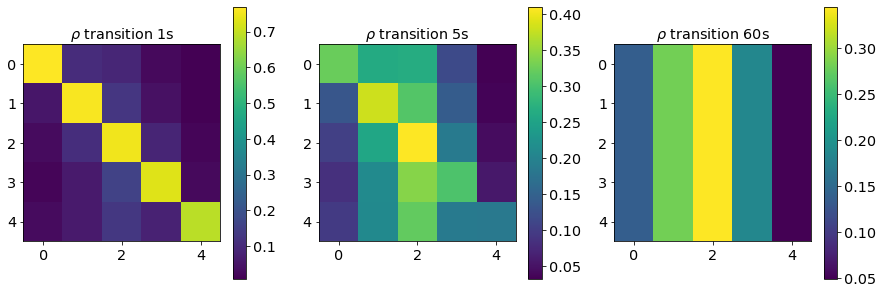

In [42]:

fig, axarr = plt.subplots(1,3)
im = axarr[0].imshow(np.linalg.matrix_power(rho_A,int(np.round(1/dt))))
axarr[0].set_title(r'$\rho$ transition 1s')
fig.colorbar(im, ax=axarr[0])

im=axarr[1].imshow(np.linalg.matrix_power(rho_A,int(np.round(5/dt))))
axarr[1].set_title(r'$\rho$ transition 5s')
fig.colorbar(im, ax=axarr[1])

im=axarr[2].imshow(np.linalg.matrix_power(rho_A,int(np.round(60/dt))))
axarr[2].set_title(r'$\rho$ transition 60s')
fig.colorbar(im, ax=axarr[2])

plt.show()

## References


1. **Cartea, A., S. Jaimungal, and J. Penalva** (2018)._Algorithmic and High-Frequency Trading._<a class="anchor" id="a"></a>

